In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import*
%matplotlib inline

In [2]:
def P(x):
    return 924*(x**6) - 2772*(x**5) + 3150*(x**4) - 1680*(x**3) + 420*(x**2) - 42*x + 1

Text(0.5, 0, 'x')

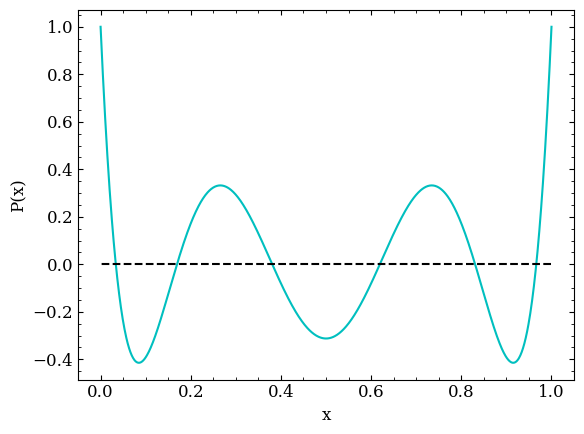

In [3]:
#a
x = np.linspace(0,1,1000)
#g = a*x
#f = P(x)
#h = function_odd
#idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
#axes[0].plot(v[idx], f[idx], 'o', ms=4, mfc='red', c='b')

plt.plot(x, P(x), c='c')
plt.hlines(0,1,0, ls='--', color='black')
plt.ylabel(r"P(x)")
plt.xlabel(r"x")

In [4]:
#b)
def dP(x): #derivada da função p(x)
    return 924*6*(x**5) - 2772*5*(x**4) + 3150*4*(x**3) - 1680*3*(x**2) + 420*2*x - 42 

x = [0,0.21,0.42,0.6,0.81, 1]
raizes = []

for i in range(0,6):
    X = x[i]
    erro = 100
    eps = 1.0e-10
    while (erro>eps):
        X2 = X
        X = X - P(X)/dP(X)
        erro = abs(X-X2)
    raizes.append(X)
    
print(f"As raízes são: {raizes}")


As raízes são: [0.03376524289842398, 0.16939530676686804, 0.38069040695840267, 0.619309593041593, 0.8306046932331647, 0.9662347571016031]


# Questão 2

Para derivar a expressão, vamos considerar as forças e as distâncias mencionadas:
- Força gravitacional que a Terra exerce no satélite:

$$
F_{terra} = \frac{G M m_s}{r²}
$$
- Força gravitacional que a lua exerce no satélite:

$$
F_{Lua} = \frac{G M m_s}{(R-r)²}
$$
- Força centrífuga sob o satélite:
Lembrando que a velocidade linear é definida como $v = w r$
$$
F_{centrífuga} = \frac{m_s v²}{r} = m_s w² r
$$

Onde $m_s$ é a massa do satélite. Quando equilibramos as forças gravitacionais com a força centrífuga no ponto de Lagrange, temos:
$$
F_{terra} + F_{Lua} = F_{centrífuga}
$$
$$
\frac{G M m_s}{r²} + \left(-\frac{G M m_s}{(R-r)²}\right) = m_s w² r
$$
E então chegamos a:
$$
\frac{G M}{r²} - \frac{G M}{(R-r)²} = w² r
$$

In [5]:
#a
R = 3.844e8
w = 2.662e-6
G = 6.674e-11
M = 5.974e24
m = 7.348e22

def f(r):
    return (G*M/(r**2) - G*m/((R-r)**2) - 2*R*(r**4) - (w**2)*r)
def df(r):
    return -2*G*M/(r**3) - (-2)*G*m/((R-r)**3)*(-1) - (w**2)

In [6]:
#Método da Secante

def metodo_secante(r_inicial, ro_inicial, tol):
    r, ro = r_inicial, ro_inicial
    erro = 100

    while erro > tol:
        dF = (f(r) - f(ro)) / (r - ro)
        ro, r = r, r - f(r) / dF
        erro = abs(r - ro)
    
    return r

r_inicial = 3e8
ro_inicial = 3.5e8
tol = 1e-4

print(f"{metodo_secante(r_inicial,ro_inicial,tol):.4f}")


8.9634


# Questão 3

In [7]:
#a)Definindo as constantes
h = 6.6261e-34
c = 2.9979e8
Kb = 1.38e-23
comp1 = 390e-9
comp2 = 750e-9

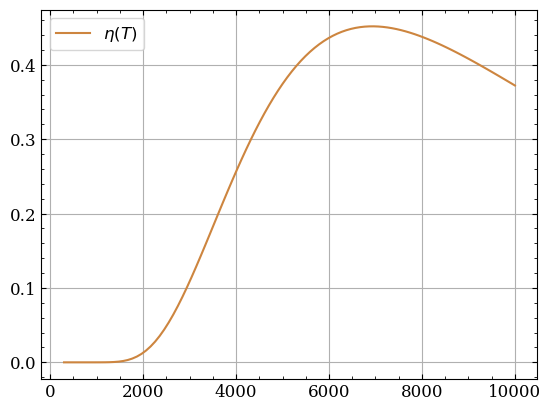

In [8]:
#Método da quadratura Gaussiana
def gaussxw(N):

    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(pi*a+1/(8*N*N*(np.tan(a))))

    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = np.max(abs(dx))

    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def H(x):
    return (x**3)/((e**x) - 1)

def N(T):
    n = 100
    b = (h*c)/(comp1*Kb*T)
    a = (h*c)/(comp2*Kb*T)
    y, w = gaussxw(n)
    
    x = (((b-a))*y + (b+a))/2
    wl = ((b-a)/2)*w
    
    soma = 0
    for k in range(n):
        soma += wl[k]*H(x[k])
    res = soma*15/(pi**4)
    return res

eta = []
temperatura = np.linspace(300,10000,100)

for n in range(0,100):
    eta.append(N(temperatura[n]))

plt.plot(temperatura,eta, label=r'$\eta(T)$', color='peru')
plt.xlabel("T (K)")
plt.ylabel(r"$\eta$")
plt.grid(True)
plt.legend()

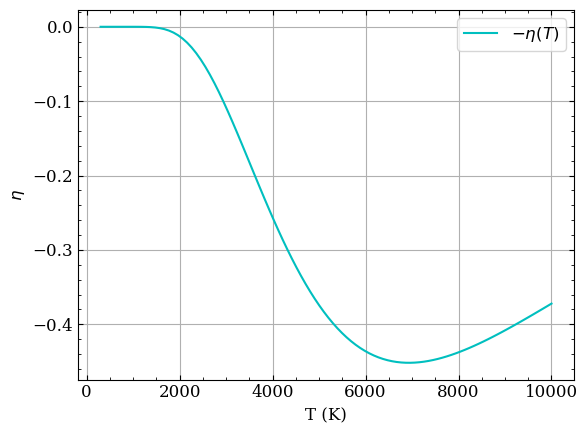

In [11]:
#b)
eta2 = []

for i in range(0, 100):
    eta2.append(-N(temperatura[i]))

plt.plot(temperatura,eta2, label=r'$-\eta(T)$', color='c')
plt.xlabel("T (K)")
plt.ylabel(r"$\eta$")
plt.grid(True)
plt.legend()

In [12]:
#Método da seção áurea
z = (1+sqrt(5))/2
x1, x4 = 5000, 8000 
x3 = x1+(x4-x1)/z
x2 = x4-x3+x1
eps = 1e-6

while(abs(x4-x1)>eps):
    if(-N(x2)<-N(x3)):
        x4 = x3
        x3 = x2
        x2 = x4-x3+x1
    else:
        x1 = x2
        x2 = x3
        x3 = x1+(x4-x1)/z
    
temp_maxima = (x1+x4)/2
print(f"A temperatura máxima é: {temp_maxima:.6f} K")

A temperatura máxima é: 6931.809830 K


A temperatura de eficiência máxima (η) encontrada foi aproximadamente 6933 K. Esta temperatura está significativamente acima da temperatura de fusão do tungstênio (3695 K). Assim, não seria prático trabalhar com filamentos de tungstênio nessa temperatura, pois o filamento derreteria e falharia imediatamente, comprometendo a eficiência e a segurança do dispositivo.